# Group assignment

## Energy data analysis

In this assignment, you will work with the `energy.csv` dataset, containing **hourly** data of energy consumption and generation in Spain. This dataset also contains the spot price of electricity.

### Rules for the assignment:

* Deadline: December 6th, 2022, 11pm.
* The group assignment's grade will be graded on the following criteria:
    * 50 %: presentation during Sessions 19 or 20
    * 50 %: answering questions during presentations
* Submission: 1 zip file containing:
    * 1 Jupyter notebook with your code: `group_assignment_group_X.ipynb`
    * 1 PDF file with your presentation
    * Not following these rules will result in a 0 grade for the assignment.
* No freeloaders during Group Assignments: if any of you see that any of your group members is not collaborating you tell me immediately. I will not accept excuses at the end of the course about the performance of any member.
* The presentation will be done by ONE (1) person chosen by the professor at random in the day of the presentations, so you all better work and collaborate to do a good job!
* All the students must be present during the presentations of the rest of the groups. 

### Type here the names of the members of your group

1. Lia Dollison
2. Ludovico Gandolfi
3. Lakshmi Pryianka Jakka
4. Hang Chi Ku
5. Iván López
6. Ignacio Pire
7. Roman Zotkin

### 0. Read the data

Read the data from the `energy.csv` file and store it in a DataFrame called `energy`.

In [1]:
import pandas as pd
import numpy as np

energy = pd.read_csv("energy.csv")

energy.head()

datetime  power_demand  nuclear     gas  solar   hydro  \
0  2018-12-31 23:00:00+00:00       23251.2   6059.2  2954.0    7.1  3202.8   
1  2019-01-01 00:00:00+00:00       22485.0   6059.2  3044.1    8.0  2884.4   
2  2019-01-01 01:00:00+00:00       20977.0   6059.2  3138.6    7.5  1950.8   
3  2019-01-01 02:00:00+00:00       19754.2   6059.2  3596.2    7.5  1675.7   
4  2019-01-01 03:00:00+00:00       19320.6   6063.4  3192.6    7.5  1581.8   

     coal    wind  spot_price  year  month  day  hour  weekday  
0  1867.0  3830.3       66.88  2018     12   31    23        0  
1  1618.0  3172.1       66.88  2019      1    1     0        1  
2  1535.3  2980.5       66.00  2019      1    1     1        1  
3  1344.0  2840.0       63.64  2019      1    1     2        1  
4  1345.0  3253.4       58.85  2019      1    1     3        1

### 1. Convert the `weekday` column from a number to a string (1 point)

Knowing that 0 represents Monday, 1 represents Tuesday, etc., convert the `weekday` column from a number to a string. 

Use `map` to perform this operation. You can mix it with a `lambda` function.

In [2]:
#Converting the Week day number to names of weekday
dict_week_name = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"}
energy["weekday"] = energy["weekday"].map(lambda m: dict_week_name[m])

#display the new dataframe with weekday names
energy.sample(5)

datetime  power_demand  nuclear      gas   solar  \
2343  2019-04-08 14:00:00+00:00       31388.2   6047.2   4827.4  2051.8   
4404  2019-07-03 11:00:00+00:00       36909.4   6927.8  10249.7  3577.1   
5607  2019-08-22 14:00:00+00:00       33164.0   6941.1  10956.6  3391.4   
1964  2019-03-23 19:00:00+00:00       29406.9   7091.6   4486.8     1.0   
7804  2019-11-22 03:00:00+00:00       24011.9   4998.9   2558.5     2.9   

       hydro    coal    wind  spot_price  year  month  day  hour    weekday  
2343  1515.3  1027.6  8891.1       51.53  2019      4    8    14     Monday  
4404  4423.6  1215.0  2806.7       53.99  2019      7    3    11  Wednesday  
5607  2444.8   300.0  3527.7       45.00  2019      8   22    14   Thursday  
1964  5063.2  1142.8  5098.9       55.01  2019      3   23    19   Saturday  
7804  3163.2   479.8  8358.5       35.88  2019     11   22     3     Friday

### 2. Same but for months (1 point)

In [3]:
#dictionary for month numbers and names
dict_month_name = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
}
energy["month"] = energy["month"].map(lambda m: dict_month_name[m])

#display the energy dataframe with month numbers as month names
energy.sample(5)

datetime  power_demand  nuclear      gas   solar  \
4378  2019-07-02 09:00:00+00:00       35617.8   6458.9  10394.5  3029.9   
1091  2019-02-15 10:00:00+00:00       35220.9   7110.7   6373.8  2872.2   
8638  2019-12-26 21:00:00+00:00       27123.0   6622.8   2122.6     2.1   
6408  2019-09-24 23:00:00+00:00       24025.9   6926.3   5849.7     NaN   
6318  2019-09-21 05:00:00+00:00       23547.0   6784.6   6432.4     7.8   

       hydro    coal    wind  spot_price  year      month  day  hour   weekday  
4378  3255.0  1207.0  3898.3       52.69  2019       July    2     9   Tuesday  
1091  3976.0  3602.9  3224.7       58.61  2019   February   15    10    Friday  
8638  7702.1   255.0  3704.8       30.58  2019   December   26    21  Thursday  
6408   698.6   695.0  6234.6       35.76  2019  September   24    23   Tuesday  
6318   807.5   505.0  5461.3       35.24  2019  September   21     5  Saturday

### 3. What's the percentage of *unique* days in the total period in which we had at least one hour with a price below 10 euros? (1 point)

I'm not asking for the percentage of days of the month (represented in the column `day`), but the percentage of *unique* dates in the total period.

Maybe it's interesting to build a new column with the date, not the datetime. You can do this with the `pd.to_datetime` function. Or you can concat columns:

In the end you'll need a column representing the date, not the datetime, not the year, month, day, etc.

In [4]:
# splitting the datetime to date
energy["datetime"] = pd.to_datetime(energy["datetime"])
energy["date"] = energy["datetime"].dt.date

# applying the filter condition  for getting the rows with atleast 1 hr and price with less than 1- euros
total_period = energy[
    (energy['spot_price'] < 10)
]

#calculating the percentage for the unique days
percentage_of_unique_days = (len(total_period['date'].unique())/(len(energy['date'].unique())))*100

percentage_of_unique_days

4.383561643835616

### 4. How many hours per month, in average, do we have a price above the monthly average? And below? (1 point)

In [6]:
month_average = energy.groupby("month")["spot_price"].mean()

energy_mth_avg = energy[[("spot_price"), ("month"), ("day"), ("hour")]]

# New column containing the monthly average

energy_mth_avg["monthly_avg"] = energy_mth_avg['month'].map(lambda m: month_average[m])

# New column with a value of 1 if spot_price is over monthly_average

energy_mth_avg["above_avg"] = np.where(
    energy_mth_avg["spot_price"] >= energy_mth_avg["monthly_avg"],
    1,
    0
)

# New column with a value of 1 if spot_price is under monthly_average

energy_mth_avg["below_avg"] = np.where(
    energy_mth_avg["spot_price"] < energy_mth_avg["monthly_avg"],
    1,
    0
)

print("Total hours above the monthly average per month on average:")
print(energy_mth_avg["above_avg"].sum()/12)

print("Total hours below the monthly average per month on average:")
print(energy_mth_avg["below_avg"].sum()/12)

Total hours above the monthly average per month on average:
415.0833333333333
Total hours below the monthly average per month on average:
313.0


/var/folders/ww/4dyn7t196598q2df399851540000gn/T/ipykernel_97892/3672914550.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_mth_avg["monthly_avg"] = energy_mth_avg['month'].map(lambda m: month_average[m])
/var/folders/ww/4dyn7t196598q2df399851540000gn/T/ipykernel_97892/3672914550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_mth_avg["above_avg"] = np.where(
/var/folders/ww/4dyn7t196598q2df399851540000gn/T/ipykernel_97892/3672914550.py:19: SettingWithCopyWarning: 
A value is trying t

### 5. Several questions (1 point)

Qualitative questions:

* Is `gas` generation higher or lower than its hourly average when `wind` generation is above its hourly average?
* Is the `spot_price` higher or lower than its hourly average when `solar` generation is above hourly its average?
* Is the `spot_price` higher or lower than its monthly average when `power_demand` is above its monthly average?


In [39]:
## Exercise 5, data preparation
## Create dictionaries each storing average values per hour or month

filled_energy = energy.fillna(0)

gas_hourly_average = dict(
    filled_energy
    .groupby("hour")
    ["gas"]
    .mean()
)

wind_hourly_average = dict(
    filled_energy
    .groupby("hour")
    ["wind"]
    .mean()
)

solar_hourly_average = dict(
    filled_energy
    .groupby("hour")
    ["solar"]
    .mean()
)

spot_price_hourly_average = dict(
    filled_energy
    .groupby("hour")
    ["spot_price"]
    .mean()
)

spot_price_monthly_average = dict(
    filled_energy
    .groupby("month")
    ["spot_price"]
    .mean()
)

power_demand_monthly_average = dict(
    filled_energy
    .groupby("month")
    ["power_demand"]
    .mean()
)

## create new columns in the dataset showing average values per hour/month as calculated above

energy_hr_avg = filled_energy

energy_hr_avg["wind_hr_avg"] = filled_energy["hour"].map(lambda m: wind_hourly_average[m])
energy_hr_avg["gas_hr_avg"] = filled_energy["hour"].map(lambda m: gas_hourly_average[m])
energy_hr_avg["solar_hr_avg"] = filled_energy["hour"].map(lambda m: solar_hourly_average[m])
energy_hr_avg["spot_hr_avg"] = filled_energy["hour"].map(lambda m: spot_price_hourly_average[m])
energy_hr_avg["spot_mth_avg"] = filled_energy["month"].map(lambda m: spot_price_monthly_average[m])
energy_hr_avg["pd_mth_avg"] = filled_energy["month"].map(lambda m: power_demand_monthly_average[m])

In [40]:
## Exercise 5_1:
## Is gas generation higher or lower than its hourly average when wind generation is above its hourly average?

## Create a working copy of the dataset

energy_gas_wind = energy_hr_avg

## Create two new columns in the dataset comparing the average hourly wind/gas production (previous step)
## with the actual wind/gas production

energy_gas_wind["wind_above_avg"] = np.where(

   energy_gas_wind["wind"] > energy_gas_wind["wind_hr_avg"],
    "above",
    "below"
)

energy_gas_wind["gas_above_avg"] = np.where(

    energy_gas_wind["gas"] > energy_gas_wind["gas_hr_avg"],
    "above",
    "below"
)

## adjust the dataset to only include data points when wind production was above hourly average

energy_gas_wind = energy_gas_wind[energy_gas_wind["wind_above_avg"] == "above"]

## check how many times the hourly gas production was above or below its average:
gas_above = energy_gas_wind[energy_gas_wind["gas_above_avg"]=="above"]["gas_above_avg"].count()
gas_below = energy_gas_wind[energy_gas_wind["gas_above_avg"]=="below"]["gas_above_avg"].count()

print("When wind generation was above its hourly average, ")
print(f"gas production was higher than its hourly average {gas_above} times.")
print(f"gas production was lower than its hourly average {gas_below} times.")

When wind generation was above its hourly average, 
gas production was higher than its hourly average 748 times.
gas production was lower than its hourly average 2864 times.


In [41]:
## Exercise 5_2
## Is the spot_price higher or lower than its hourly average when solar generation is above hourly its average?

## Create a working copy of the dataset

energy_spot_solar = energy_hr_avg

## Create a new column in the dataset comparing the average hourly solar production 
## with the actual production and another column comparing the spot price with the average hourly
## spot price.

energy_spot_solar["solar_above_avg"] = np.where(

   energy_spot_solar["solar"] > energy_spot_solar["solar_hr_avg"],
    "above",
    "below"
)

energy_spot_solar["spot_above_avg"] = np.where(

   energy_spot_solar["spot_price"] > energy_spot_solar["spot_hr_avg"],
    "above",
    "below"
)

## adjust the dataset to only include data points when solar production was above hourly average

energy_spot_solar = energy_spot_solar[energy_spot_solar["solar_above_avg"] == "above"]

## check how many times the hourly spot price was above or below its average:
spot_above = energy_spot_solar[energy_spot_solar["spot_above_avg"]=="above"]["spot_above_avg"].count()
spot_below = energy_spot_solar[energy_spot_solar["spot_above_avg"]=="below"]["spot_above_avg"].count()

print("When solar generation was above its hourly average, ")
print(f"spot price was higher than its hourly average {spot_above} times.")
print(f"spot price was lower than its hourly average {spot_below} times.")

When solar generation was above its hourly average, 
spot price was higher than its hourly average 1590 times.
spot price was lower than its hourly average 1656 times.


In [42]:
## Exercise 5_3
## Is the spot_price higher or lower than its monthly average when power_demand is above its monthly average?

## Create a working copy of the dataset

energy_spot_demand = energy_hr_avg

## Create a new column in the dataset comparing the average monthly power demand 
## with the actual power demand and another column comparing the average monthly spot price
## with the actual spot price.

energy_spot_demand["pd_above_avg"] = np.where(

  energy_spot_demand["power_demand"] > energy_spot_demand["pd_mth_avg"],
    "above",
    "below"
)

energy_spot_demand["m_spot_above_avg"] = np.where(

    energy_spot_demand["spot_price"] > energy_spot_demand["spot_mth_avg"],
    "above",
    "below"
)

## adjust the dataset to only include data points when power demand was above monthly average

energy_spot_demand = energy_spot_demand[energy_spot_demand["pd_above_avg"] == "above"]

m_spot_above = energy_spot_demand[energy_spot_demand["m_spot_above_avg"]=="above"]["m_spot_above_avg"].count()
m_spot_below = energy_spot_demand[energy_spot_demand["m_spot_above_avg"]=="below"]["m_spot_above_avg"].count()

print("When power demand was above its monthly average, ")
print(f"spot price was higher than its monthly average {m_spot_above} times.")
print(f"spot price was lower than its monthly average {m_spot_below} times.")

When power demand was above its monthly average, 
spot price was higher than its monthly average 3521 times.
spot price was lower than its monthly average 988 times.


### 6. Understanding types of power generation (1 point)

The different types of power generation are:
* `nuclear`: nuclear power plants
* `hydro`: hydroelectric power plants
* `wind`: wind power plants
* `solar`: solar power plants
* `gas`: gas power plants
* `coal`: coal power plants

6.1. What's the average contribution of each type of power generation in percentage to the total generation, in the whole period?

6.2. What was the average contribution of each type power generation in percentage in the most expensive month?

6.3. What was the average contribution of each type power generation in percentage in the cheapest month?

In [43]:
# 6.1. What's the average contribution of each type of power generation in percentage to the total generation,
    # in the whole period?

total_energy_gen = energy[[("nuclear"),("gas"),("solar"),("hydro"),("coal"),("wind")]].fillna(0)

total_energy_gen["total_gen"] = total_energy_gen["nuclear"] + total_energy_gen["gas"] + total_energy_gen["solar"] + total_energy_gen["hydro"] + total_energy_gen["coal"] + total_energy_gen["wind"]

for x in range(6):
    
    total_energy_gen[f"%_{total_energy_gen.columns[x]}"] = (total_energy_gen[total_energy_gen.columns[x]] / total_energy_gen["total_gen"]) * 100

for i in range(7, 13):
    
    print("\nAverage contributon of " + total_energy_gen.columns.values[i-7] + " power ")
    print(total_energy_gen.iloc[:, i].mean())

total_energy_gen.sample(5)


Average contributon of nuclear power 
27.98498897271831

Average contributon of gas power 
25.161466845079374

Average contributon of solar power 
4.106953788920754

Average contributon of hydro power 
11.839694124985558

Average contributon of coal power 
5.1665458675727

Average contributon of wind power 
25.740350400723198


nuclear      gas   solar   hydro    coal    wind  total_gen  %_nuclear  \
8553   5090.7   2570.8   781.1  7272.2   270.0  9361.5    25346.3  20.084588   
5656   6937.3   9685.5  2839.1  1066.8   255.0  2575.2    23358.9  29.698744   
158    7110.5   6203.3  2813.8  2718.5  4638.3  5258.9    28743.3  24.737939   
4334   6922.3   7019.3  3419.6  2018.7   687.4  3756.4    23823.7  29.056360   
5060   6985.5  10010.9    48.1  1588.5   805.0  5808.8    25246.8  27.668853   

          %_gas    %_solar    %_hydro     %_coal     %_wind  
8553  10.142703   3.081712  28.691367   1.065244  36.934385  
5656  41.463853  12.154254   4.566996   1.091661  11.024492  
158   21.581725   9.789412   9.457856  16.136978  18.296090  
4334  29.463517  14.353774   8.473495   2.885362  15.767492  
5060  39.652154   0.190519   6.291886   3.188523  23.008064

In [45]:
#6.2. What was the average contribution of each type power generation in percentage in the most expensive month?

most_expensive = energy.groupby("month")["spot_price"].sum().idxmax()

total_energy_expensive = energy[[("nuclear"),("gas"),("solar"),("hydro"),("coal"),("wind"),("month")]].fillna(0)[energy["month"] == most_expensive]

total_energy_expensive["total_gen"] = total_energy_expensive["nuclear"] + total_energy_expensive["gas"] + total_energy_expensive["solar"] + total_energy_expensive["hydro"] + total_energy_expensive["coal"] + total_energy_expensive["wind"]

for x in range(6):
    
    total_energy_expensive[f"%_{total_energy_expensive.columns[x]}"] = (total_energy_expensive[total_energy_expensive.columns[x]] / total_energy_expensive["total_gen"]) * 100

for i in range(8, 14):
    
    print("\nAverage contributon of " + total_energy_expensive.columns.values[i-8] + f" power in {most_expensive}:")
    print(total_energy_expensive.iloc[:, i].mean())

total_energy_expensive.sample(5)


Average contributon of nuclear power in January:
26.189345916305744

Average contributon of gas power in January:
15.917610128321028

Average contributon of solar power in January:
2.198412708846326

Average contributon of hydro power in January:
10.614893230476957

Average contributon of coal power in January:
15.525175616219466

Average contributon of wind power in January:
29.554562399830466


nuclear     gas   solar   hydro    coal     wind    month  total_gen  \
283   7102.0  4312.0     3.5  4182.4  4221.6   8172.8  January    27994.3   
223   7105.4  3518.2     2.8  2316.2  4924.6  10896.6  January    28763.8   
87    6419.6  8567.0  2287.2  3977.3  3926.2   2396.5  January    27573.8   
459   6038.9  1672.1    12.1  1053.7  4203.4   6621.0  January    19601.2   
454   6038.9  4109.8     2.8  2258.6  5581.8   7449.0  January    25440.9   

     %_nuclear      %_gas   %_solar    %_hydro     %_coal     %_wind  
283  25.369450  15.403136  0.012503  14.940184  15.080213  29.194515  
223  24.702578  12.231346  0.009734   8.052483  17.120825  37.883034  
87   23.281521  31.069348  8.294831  14.424200  14.238879   8.691221  
459  30.808828   8.530600  0.061731   5.375691  21.444605  33.778544  
454  23.736975  16.154303  0.011006   8.877831  21.940262  29.279625

In [47]:
#6.3. What was the average contribution of each type power generation in percentage in the cheapest month?

cheapest_month = energy.groupby("month")["spot_price"].sum().idxmin()

total_energy_cheap = energy[[("nuclear"),("gas"),("solar"),("hydro"),("coal"),("wind"),("month")]].fillna(0)[energy["month"] == cheapest_month]

total_energy_cheap["total_gen"] = total_energy_cheap["nuclear"] + total_energy_cheap["gas"] + total_energy_cheap["solar"] + total_energy_cheap["hydro"] + total_energy_cheap["coal"] + total_energy_cheap["wind"]

for x in range(6):
    
    total_energy_cheap[f"%_{total_energy_cheap.columns[x]}"] = (total_energy_cheap[total_energy_cheap.columns[x]] / total_energy_cheap["total_gen"]) * 100

for i in range(8, 14):
    
    print("\nAverage contributon of " + total_energy_cheap.columns.values[i-8] + f" power in {cheapest_month}:")
    print(total_energy_cheap.iloc[:, i].mean())

total_energy_cheap.sample(5)


Average contributon of nuclear power in December:
24.47696649497207

Average contributon of gas power in December:
14.997181123164474

Average contributon of solar power in December:
2.635510513873528

Average contributon of hydro power in December:
25.955194125443157

Average contributon of coal power in December:
2.2482461417390844

Average contributon of wind power in December:
29.68690160080767


nuclear     gas   solar   hydro    coal     wind     month  total_gen  \
8513   4360.4  1037.5   131.0  7979.4     0.0  12083.4  December    25591.7   
8119   5000.5  6074.4     5.9  6533.4  1306.7   7619.3  December    26540.2   
8170   5478.7  7461.1  2298.4  5924.2  1066.0   1265.3  December    23493.7   
8437   6059.2  4454.5  2844.8  6777.7   460.6   8612.6  December    29209.4   
8546   4354.8  1593.5     1.0  6793.4     0.0   9588.7  December    22331.4   

      %_nuclear      %_gas   %_solar    %_hydro    %_coal     %_wind  
8513  17.038337   4.054049  0.511885  31.179640  0.000000  47.216090  
8119  18.841230  22.887544  0.022230  24.616996  4.923475  28.708525  
8170  23.319869  31.757876  9.783048  25.216122  4.537387   5.385699  
8437  20.744007  15.250228  9.739330  23.203832  1.576890  29.485714  
8546  19.500793   7.135692  0.004478  30.420842  0.000000  42.938195

### 8. Weekends vs weekdays (1 point)

Create a column called `weekend` that is `True` if the day is a weekend and `False` if it's a weekday. Use `np.where` to create this column.

How much expensive in average is a weekend day compared to a weekday?

In [51]:
weekend_weekday = energy

weekend_weekday["weekend"] = np.where(
    weekend_weekday["weekday"].isin(["Saturday", "Sunday"]),
    "True",
    "False"
)

filtered_weekend_weekday = weekend_weekday

average_prices = filtered_weekend_weekday.groupby("weekend")[["spot_price"]].mean()

print(average_prices)

print("\nDifference between weekdays and weekends:")
print(average_prices.iloc[0] - average_prices.iloc[1])

         spot_price
weekend            
False     49.171389
True      44.041915

Difference between weekdays and weekends:
spot_price    5.129474
dtype: float64


### 7. Open questions (2 points)

1. What´s the effect of hydroelectric power generation on the price of electricity?
2. What´s the effect of wind power generation on the price of electricity?
3. What´s the effect of solar power generation on the price of electricity?
4. What´s the effect of nuclear power generation on the price of electricity?
5. What´s the effect of gas power generation on the price of electricity?
6. What´s the effect of coal power generation on the price of electricity?

Spoiler: you can plot in `pandas` with `df.plot()`.

In [52]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from matplotlib import pyplot as plt

In [53]:
energy_spot_price = energy[[('hour'),("nuclear"),("gas"),("solar"),("hydro"),("coal"),("wind"),('spot_price')]].fillna(0)

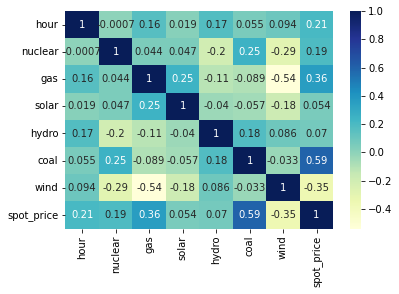

In [54]:
#Correlation Matrix
matrix = energy_spot_price.corr()
import seaborn as sb
dataplot = sb.heatmap(matrix,cmap="YlGnBu", annot=True)

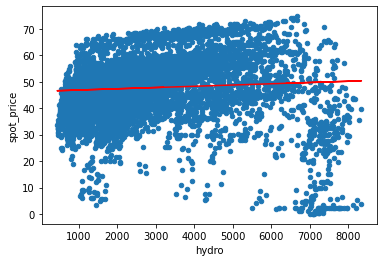

In [55]:
# There is no obvious relationship between hydro and the spot price. However, when hydro production is very high, the spot price tends to be lower than average.
energy_spot_price.plot(x="hydro", y="spot_price", kind="scatter")
m, b = np.polyfit(energy_spot_price["hydro"], energy_spot_price["spot_price"], 1)
plt.plot(energy_spot_price["hydro"], m*energy_spot_price["hydro"] + b, color = 'red')

In [56]:
# Regression Analysis for hydro
hydro_model = ols("hydro ~ spot_price", data=energy_spot_price).fit()
print(hydro_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  hydro   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     43.03
Date:                Tue, 06 Dec 2022   Prob (F-statistic):           5.68e-11
Time:                        15:28:39   Log-Likelihood:                -76886.
No. Observations:                8737   AIC:                         1.538e+05
Df Residuals:                    8735   BIC:                         1.538e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2309.3117     77.234     29.900      0.0

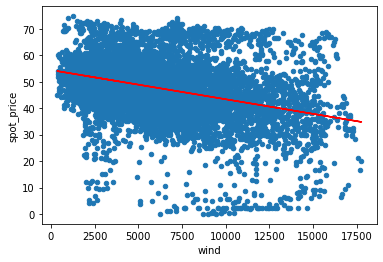

In [57]:
#2 Wind production has a negative correlation with spot price
energy_spot_price.plot(x="wind", y="spot_price", kind="scatter")
m, b = np.polyfit(energy_spot_price["wind"], energy_spot_price["spot_price"], 1)
plt.plot(energy_spot_price["wind"], m*energy_spot_price["wind"] + b, color = 'red')

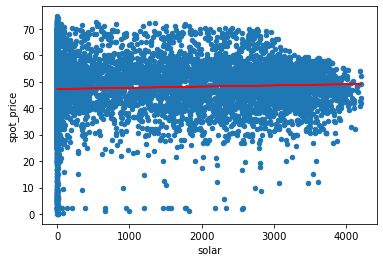

In [58]:
#3 Solar production has no obvious impact on spot price
energy_spot_price.plot(x="solar", y="spot_price", kind="scatter")
m, b = np.polyfit(energy_spot_price["solar"], energy_spot_price["spot_price"], 1)
plt.plot(energy_spot_price["solar"], m*energy_spot_price["solar"] + b, color = 'red')

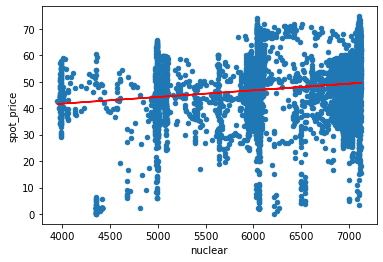

In [59]:
#4 Nuclear production is high when spot price is high 
energy_spot_price.plot(x="nuclear", y="spot_price", kind="scatter")
m, b = np.polyfit(energy_spot_price["nuclear"], energy_spot_price["spot_price"], 1)
plt.plot(energy_spot_price["nuclear"], m*energy_spot_price["nuclear"] + b, color = 'red')

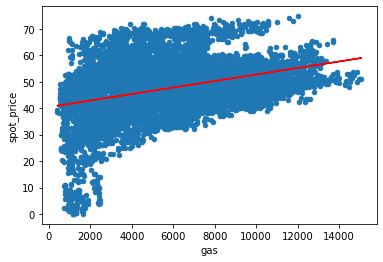

In [60]:
#5 Gas production has a positive correlation with spot price 
energy_spot_price.plot(x="gas", y="spot_price", kind="scatter")
m, b = np.polyfit(energy_spot_price["gas"], energy_spot_price["spot_price"], 1)
plt.plot(energy_spot_price["gas"], m*energy_spot_price["gas"] + b, color = 'red')

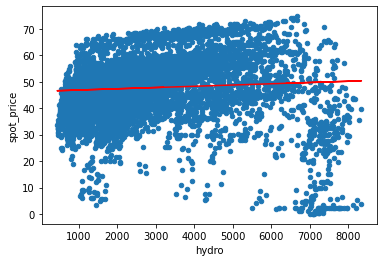

In [61]:
#6 Coal production has a positive correlation with spot price
energy_spot_price.plot(x="hydro", y="spot_price", kind="scatter")
m, b = np.polyfit(energy_spot_price["hydro"], energy_spot_price["spot_price"], 1)
plt.plot(energy_spot_price["hydro"], m*energy_spot_price["hydro"] + b, color = 'red')

In [62]:
# Regression analysis for coal
coal_model = ols("coal ~ spot_price", data=energy_spot_price).fit()
print(coal_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   coal   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     4699.
Date:                Tue, 06 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:28:52   Log-Likelihood:                -73235.
No. Observations:                8737   AIC:                         1.465e+05
Df Residuals:                    8735   BIC:                         1.465e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2156.7811     50.860    -42.406      0.0